In [498]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from imblearn.pipeline import Pipeline 
from imblearn import combine
from imblearn import under_sampling
from imblearn import over_sampling
from sklearn import ensemble
from sklearn import neural_network
from sklearn import neighbors
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
np.seterr(divide='ignore', invalid='ignore')
#svm.LinearSVC
#neighbors.KNeighborsClassifier
#neural_network.MLPClassifier
#ensemble.RandomForestClassifier

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

(85273, 24, 24, 1)
3


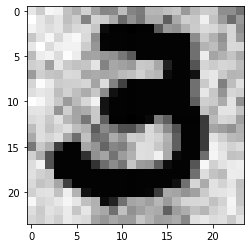

In [489]:
X = np.load("MNIST-images.npy")
y = np.load("MNIST-labels.npy")
print(X.shape)

X = X.reshape(X.shape[0], 576)

X_train, X_valTest, y_train, y_valTest = train_test_split(X, y, test_size=.3, random_state=42)

X_train = X_train.reshape(59691, 24, 24)
plt.imshow(X_train[42], cmap="Greys")
print(y_train[42])

X_train = X_train.reshape(X_train.shape[0], 576)

In [490]:
#explore = pd.DataFrame(data=y)
#print(explore.value_counts())

def preprocess(data):
    X_train = np.array([np.squeeze(i) for i in data])

    X_train[X_train >= 190] = 255
    X_train[X_train < 190] = 0

    # pca = PCA(n_components=.9)
    # pca_arr = []
    # for i in range(len(X_train)):
    #     hold = [pca.fit_transform(X_train[i])]
    #     pca_arr.append([pca.inverse_transform(hold[0])])

    # X_train = np.array([np.squeeze(i) for i in pca_arr])

    # X_train[X_train >= 190] = 255
    # X_train[X_train < 190] = 0

    return X_train

#plt.imshow(preprocess(X_train)[42], cmap="Greys")

In [491]:
from sklearn.preprocessing import FunctionTransformer


X_train = preprocess(X_train)
pre_trans = FunctionTransformer(preprocess)

In [492]:
smote = over_sampling.RandomOverSampler(sampling_strategy="minority")
X_train, y_train = smote.fit_resample(X_train , y_train)

smote = under_sampling.RandomUnderSampler(sampling_strategy="all")
X_train, y_train = smote.fit_resample(X_train , y_train)

X_val, X_test, y_val, y_test = train_test_split(X_valTest, y_valTest, test_size=.5, random_state=42)

score = pd.DataFrame(np.array(y_val), columns = ["actual"])

explore = pd.DataFrame(data=y_train)
exploreX = pd.DataFrame(data=y_train)
print(explore.value_counts())

3     21441
1      4802
7      4403
0      4174
6      4160
10     4155
2      4146
9      4129
4      4091
5      3778
8       412
dtype: int64


In [499]:
pipe = Pipeline([('scaler', PCA(.9), ), ("model", neighbors.KNeighborsClassifier())])
pipe.fit(X_train, y_train)
yeet = pipe.predict(X_val)
print(metrics.accuracy_score(y_val, yeet))

NameError: name 'smt' is not defined

In [494]:
#learn fast, but slow af in predict
resultsKN = []
for x in range(1):
    x = x+1
    svm1 = neighbors.KNeighborsClassifier(n_neighbors=x)
    svm1.fit(X_train, y_train)
    result = svm1.predict(X_val)

    resultsKN.append((x,metrics.accuracy_score(y_val, result)))

print(resultsKN)

[(1, 0.9066531154718162)]


In [495]:
svm1 = ensemble.RandomForestClassifier()
svm1.fit(X_train, y_train)
result = svm1.predict(X_val)
print(metrics.accuracy_score(y_val, result))

0.7905558595887734


In [496]:
#slow af in learning
results = []
for x in range(1):
    x = 99+1
    svm1 = neural_network.MLPClassifier(hidden_layer_sizes=x)
    svm1.fit(X_clean, y_train)
    result = svm1.predict(X_val)

    results.append((x,metrics.accuracy_score(y_val, result)))
print(results)


ValueError: Found input variables with inconsistent numbers of samples: [85273, 41558]

In [ ]:
svm1 = linear_model.LogisticRegression()
svm1.fit(X_train, y_train)
result = svm1.predict(X_val)
print(metrics.accuracy_score(y_val, result))

0.18294113048237043


c:\Users\kevin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
"""
maxx = 0
maxval = 0
for x in range(len(results)):
    if (results[x][1] > maxval):
        maxval = results[x][1]
        maxx = x

print(maxval, maxx) #0.8716284887811743 96
"""

'\nmaxx = 0\nmaxval = 0\nfor x in range(len(results)):\n    if (results[x][1] > maxval):\n        maxval = results[x][1]\n        maxx = x\n\nprint(maxval, maxx) #0.8716284887811743 96\n'